In [602]:
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing, cluster, pipeline, compose, decomposition
import plotly.graph_objects as go

In [546]:
dfClean = pd.read_csv('../archive/df_modelisation.csv')

In [547]:
dfClean

,customer_id,order_item_id,seller_id,price,freight_value,product_category_name,review_score,payment_type,product_id,shipping_limit_date,customer_state
0,00012a2ce6f8dcda20d059ce98491703,1,1,89.80,24.94,Gadget,1.0,credit_card,1,2017-11-21 16:35:32,São Paulo
1,000161a058600d5901f007fab4c27140,1,1,54.90,12.51,Parfum et soin,4.0,credit_card,1,2017-07-20 09:55:12,Minas Gerais
2,0001fd6190edaaf884bcaf3d49edf079,1,1,179.99,15.43,Utilitaire pour bebe,5.0,credit_card,1,2017-03-06 11:15:20,Espírito Santo
3,0002414f95344307404f0ace7a26f1d5,1,1,149.90,29.45,Gadget,5.0,boleto,1,2017-08-23 03:10:27,Minas Gerais
4,000379cdec625522490c315e70c7a9fb,1,1,93.00,14.01,Housing,4.0,boleto,1,2018-04-10 03:10:19,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...
94897,fffcb937e9dd47a13f05ecb8290f4d3e,1,1,78.00,13.91,Livre et papeterie,5.0,credit_card,1,2018-03-22 01:35:21,São Paulo
94898,fffecc9f79fd8c764f843e9951b11341,3,1,54.90,26.46,Housing,3.0,voucher,3,2018-04-04 17:10:27,Rio Grande do Sul
94899,fffeda5b6d849fbd39689bb92087f431,1,1,47.90,15.23,Telephonie et sécurite,4.0,credit_card,1,2018-05-28 13:54:37,Rio de Janeiro
94900,ffff42319e9b2d713724ae527742af25,1,1,199.90,14.23,Housing,5.0,credit_card,1,2018-06-15 17:20:23,São Paulo


In [548]:
dfClean['shipping_limit_date'] = pd.to_datetime(pd.to_datetime(dfClean['shipping_limit_date']).dt.date)

In [549]:
df_tempo = pd.DataFrame((pd.to_datetime('2018-12-31') - dfClean.groupby('customer_id')['shipping_limit_date'].max()).dt.days).rename(columns={"shipping_limit_date":"recency"}).reset_index()

In [550]:
dfClean = pd.merge(dfClean, df_tempo, on="customer_id")

In [551]:
dfClean = dfClean.drop("shipping_limit_date",axis=1)

In [552]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94902 entries, 0 to 94901
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            94902 non-null  object 
 1   order_item_id          94902 non-null  int64  
 2   seller_id              94902 non-null  int64  
 3   price                  94902 non-null  float64
 4   freight_value          94902 non-null  float64
 5   product_category_name  94902 non-null  object 
 6   review_score           94902 non-null  float64
 7   payment_type           94902 non-null  object 
 8   product_id             94902 non-null  int64  
 9   customer_state         94902 non-null  object 
 10  recency                94902 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 8.7+ MB


In [553]:
X = dfClean.values

In [554]:
n_clusters = 5
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=3, n_init=5, n_jobs=-1, max_iter=5)
clusters = kproto.fit_predict(X, categorical=[0,5,7,9])
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing centroids
Starting iterations...
Starting iterations...
Starting iterations...
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 4, iteration: 1/5, moves: 13066, ncost: 1844288092.3938062
Run: 2, iteration: 1/5, moves: 17711, ncost: 1970932174.3292274
Run: 3, iteration: 1/5, moves: 24600, ncost: 2336830893.6854587
Run: 1, iteration: 1/5, moves: 16942, ncost: 2312795743.306921
Run: 5, iteration: 1/5, moves: 19552, ncost: 2366882086.6965485
Run: 4, iteration: 2/5, moves: 4172, ncost: 1707710310.2694712
Run: 2, iteration: 2/5, move

array([2, 0, 0, ..., 3, 3, 0], dtype=uint16)

In [555]:
dfClean['ClustersLabel'] = kproto.labels_

In [556]:
dfClean.head(30)

,customer_id,order_item_id,seller_id,price,freight_value,product_category_name,review_score,payment_type,product_id,customer_state,recency,ClustersLabel
0,00012a2ce6f8dcda20d059ce98491703,1,1,89.80,24.94,Gadget,1.0,credit_card,1,São Paulo,405,2
1,000161a058600d5901f007fab4c27140,1,1,54.90,12.51,Parfum et soin,4.0,credit_card,1,Minas Gerais,529,0
2,0001fd6190edaaf884bcaf3d49edf079,1,1,179.99,15.43,Utilitaire pour bebe,5.0,credit_card,1,Espírito Santo,665,0
3,0002414f95344307404f0ace7a26f1d5,1,1,149.90,29.45,Gadget,5.0,boleto,1,Minas Gerais,495,0
4,000379cdec625522490c315e70c7a9fb,1,1,93.00,14.01,Housing,4.0,boleto,1,São Paulo,265,3
5,0004164d20a9e969af783496f3408652,1,1,59.99,11.81,Sport,1.0,voucher,1,São Paulo,622,0
6,000419c5494106c306a97b5635748086,1,1,34.30,15.10,Fashion,1.0,credit_card,1,Rio de Janeiro,298,2
7,00046a560d407e99b969756e0b10f282,1,1,120.90,45.69,Gadget,5.0,credit_card,1,Rio de Janeiro,374,2
8,00050bf6e01e69d5c0fd612f1bcfb69c,1,1,69.99,15.24,Fashion,5.0,credit_card,1,Rio Grande do Sul,466,2
9,000598caf2ef4117407665ac33275130,1,1,1107.00,148.71,Animalerie,5.0,credit_card,1,Minas Gerais,132,1


In [557]:
dfClean['Segment'] = dfClean['ClustersLabel'].map({0:'First', 1:'Second', 2:'Third', 3:'Four', 4:'Five'})

In [558]:
dfClean['Segment'] = dfClean['Segment'].astype('category')
dfClean['Segment'] = dfClean['Segment'].cat.reorder_categories(['First','Second','Third','Four','Five'])

In [559]:
dfClean.columns

Index(['customer_id', 'order_item_id', 'seller_id', 'price', 'freight_value',
       'product_category_name', 'review_score', 'payment_type', 'product_id',
       'customer_state', 'recency', 'ClustersLabel', 'Segment'],
      dtype='object')

In [560]:
dfClean = dfClean.drop(['customer_id', 'order_item_id', 'seller_id', 'product_id'],axis=1)

In [561]:
dfClean.rename(columns = {'ClustersLabel':'Total'}, inplace = True)
df_segment = dfClean.groupby('Segment').agg(
    {
        'payment_type': lambda x: x.value_counts().index[0],
        'product_category_name': lambda x: x.value_counts().index[0],
        'price': 'mean',
        'freight_value': 'mean',
        'review_score': 'mean',
        'recency': 'mean',
        'customer_state' : lambda x: x.value_counts().index[0]

    }
).reset_index()
df_segment

,Segment,payment_type,product_category_name,price,freight_value,review_score,recency,customer_state
0,First,credit_card,Housing,99.618731,20.270688,4.170580,577.168941,São Paulo
1,Second,credit_card,Informatique et electronique,1674.270967,72.905628,3.912688,362.951005,São Paulo
2,Third,credit_card,Housing,91.170041,19.852778,4.008291,373.577742,São Paulo
3,Four,credit_card,Housing,96.985194,21.651491,4.201717,205.025641,São Paulo
4,Five,credit_card,Parfum et soin,514.620401,44.760105,3.945664,349.585362,São Paulo


In [562]:
num = list(dfClean.select_dtypes(['float', 'int']).columns)
cat = list(dfClean.select_dtypes(['object', 'category']).columns)

In [563]:
one_hot_sparse = preprocessing.OneHotEncoder(sparse=True)
one_hot = preprocessing.OneHotEncoder(sparse=False)


# log x +1
log = preprocessing.FunctionTransformer(func=np.log1p)

# Valeur absolue
abso = preprocessing.FunctionTransformer(func=np.abs)


# Pipelines
std_log = pipeline.make_pipeline(log)
abso_std_log = pipeline.make_pipeline(abso, log)

In [564]:
preprocessor_sparse = compose.make_column_transformer(
    (abso_std_log, num),
    (std, num),
    (one_hot_sparse, cat)
)

In [565]:
preprocessor = compose.make_column_transformer(
    (abso_std_log, num),
    (one_hot, cat)
)

PCA

In [566]:
X = dfClean
n_comp = 6  # Nombre de dimensions
features = dfClean.columns  # Extraction des noms de variables
names = dfClean.index  # Ex

In [567]:
pca = decomposition.PCA(n_components=n_comp)

pipeline_pca = pipeline.make_pipeline(preprocessor, pca)

In [568]:
pipeline_pca.fit(X)

/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['price', 'freight_value',
                                                   'review_score', 'recency']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['product_category_name',
                                                   'payment_type',
                                                   'customer_state',
                                                   'Segment'])])),
                ('pca', PCA(n_components=6))])

In [569]:
print(pipeline_pca[1].explained_variance_ratio_)

[0.22623454 0.11490181 0.07930027 0.07403016 0.06981034 0.04306681]


In [570]:
labels = pd.get_dummies(X).columns
labels

Index(['price', 'freight_value', 'review_score', 'recency', 'Total',
       'product_category_name_Animalerie',
       'product_category_name_Art et manufacture',
       'product_category_name_Automobile', 'product_category_name_Cadeaux',
       'product_category_name_Fashion', 'product_category_name_Furniture',
       'product_category_name_Gadget', 'product_category_name_Housing',
       'product_category_name_Informatique et electronique',
       'product_category_name_Livre et papeterie',
       'product_category_name_Musique et instruments',
       'product_category_name_Nourriture et cuisine',
       'product_category_name_Parfum et soin',
       'product_category_name_Quincalerie', 'product_category_name_Sport',
       'product_category_name_Telephonie et sécurite',
       'product_category_name_Utilitaire pour bebe',
       'payment_type_['credit_card' 'voucher']', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher'

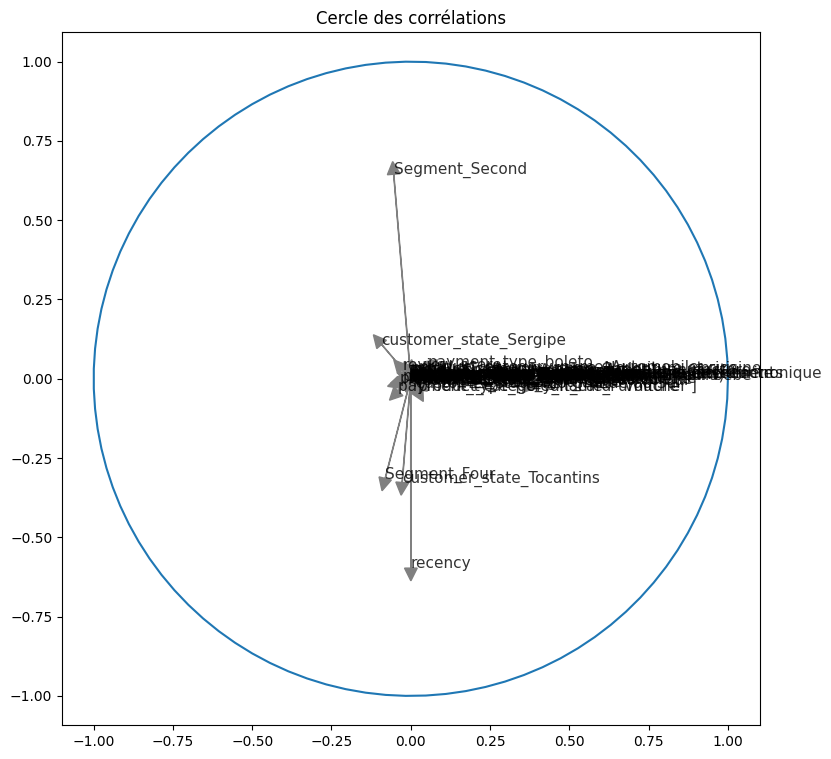

In [571]:
(fig, ax) = plt.subplots(figsize=(9, 9))
for i in range(0, pipeline_pca[1].components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  # 0 for PC1
             pca.components_[1, i],  # 1 for PC2
             head_width=0.04,
             head_length=0.04,
             color='gray'
             )

    plt.text(pca.components_[0, i],
             pca.components_[1, i],
             labels[i],
             fontsize=11,
             alpha=0.8
             )


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Cercle des corrélations')
plt.show()


/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: Fut

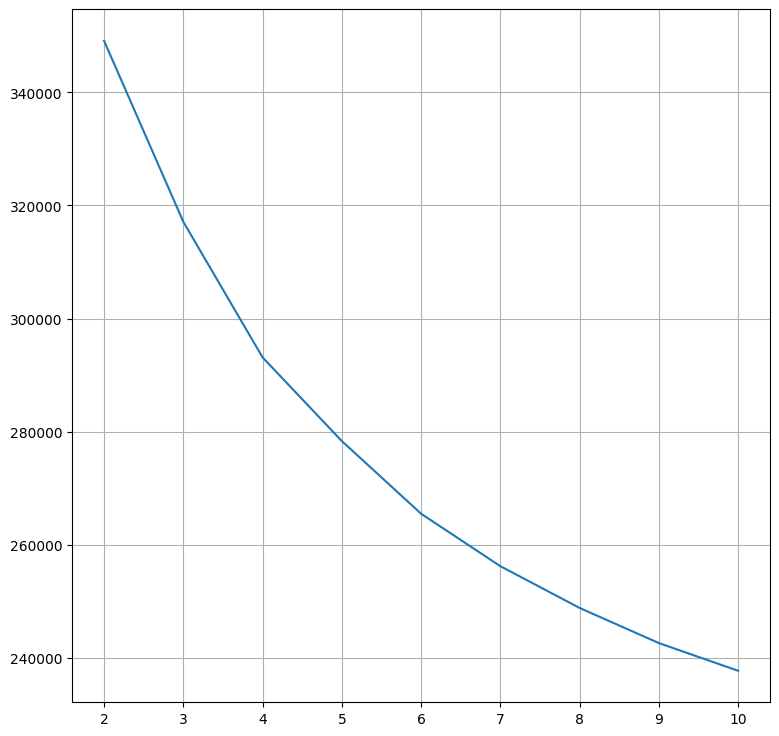

In [572]:
inertia = []
nb_cluster_max = 10
for z in range(2,nb_cluster_max+1):
    kmeans = cluster.KMeans(n_clusters = z)
    k_pipe = pipeline.make_pipeline(preprocessor, kmeans)
    k_pipe.fit(X)
    inertia.append(k_pipe[1].inertia_)
    
x = np.arange(2,nb_cluster_max+1)

fig, ax = plt.subplots(figsize=(9, 9))
ax.set_xticks(ticks=np.arange(0,25,1))
ax.grid(b=True)
plt.plot(x, inertia)
plt.show()

In [573]:
kmeans = cluster.KMeans(n_clusters = n_clusters)
k_pipe = pipeline.make_pipeline(preprocessor, kmeans).fit(X)
pred = k_pipe.predict(X)

/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [574]:
def display_factorial_planes_sns(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None, title=None, cmap=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                fig, ax = plt.subplots(figsize=(10,10))
                sns.scatterplot(x=X_projected[:, d1], y=X_projected[:, d2], hue=illustrative_var, alpha=alpha,  palette=cmap)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig(title)
            plt.show(block=False)

In [575]:
cmap = {
    0:'Crimson',
    1:'Sienna',
    2:'DarkBlue',
    3:'Orange',
    4:'Black',
    5:'Silver',
    6:'Chartreuse',
    7:'Fuchsia',
    8:'gray',
    9:'gray',
    10:'gray',
    11:'gray',
}

In [576]:
X_projected = pipeline_pca.transform(X)

<Figure size 700x600 with 0 Axes>

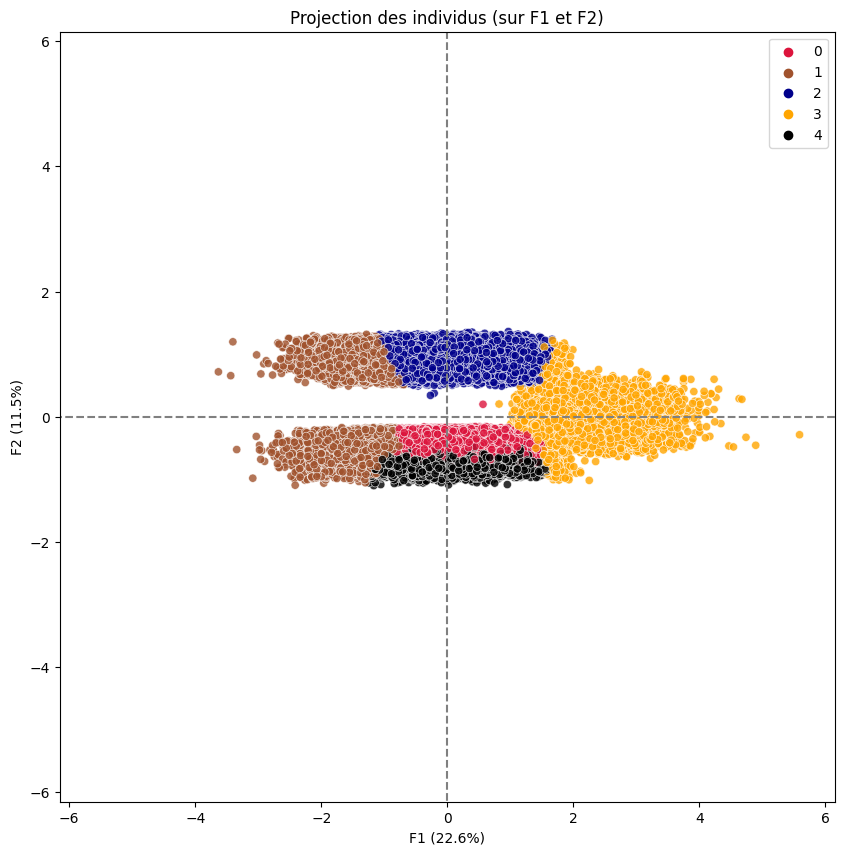

<Figure size 700x600 with 0 Axes>

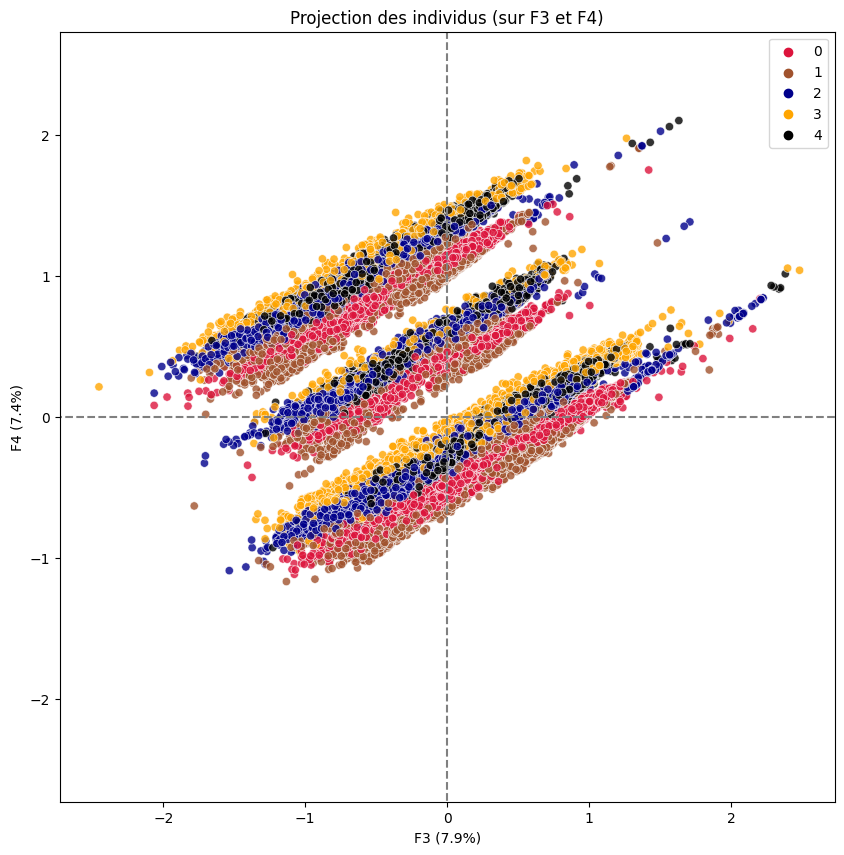

<Figure size 700x600 with 0 Axes>

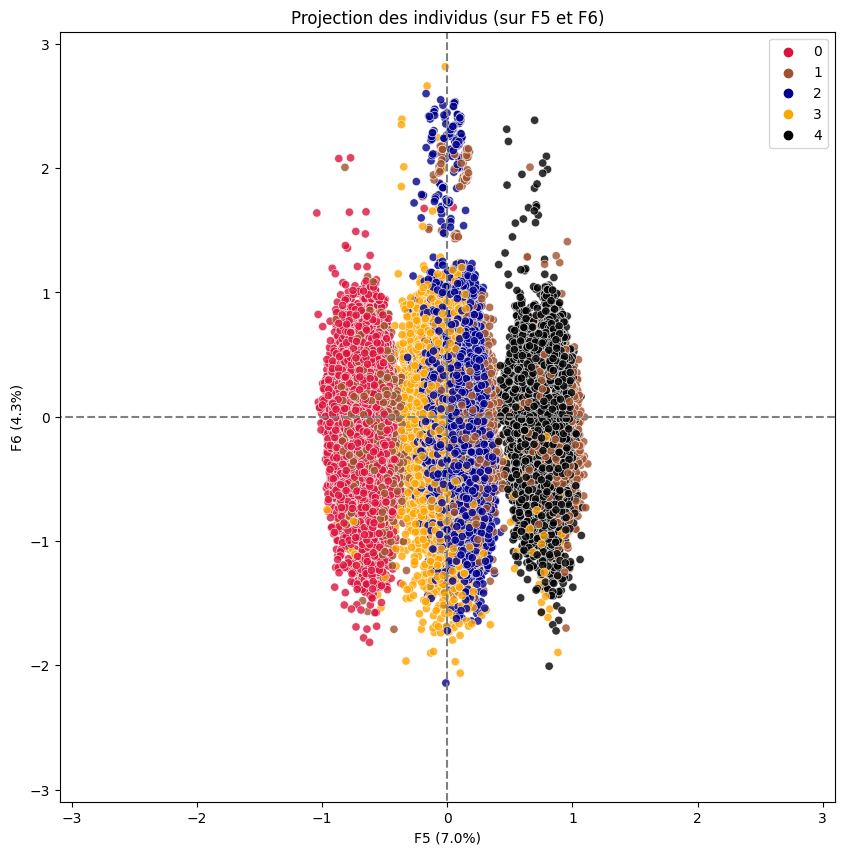

In [577]:
display_factorial_planes_sns(X_projected, n_comp, pipeline_pca[1], [(0,1),(2,3),(4,5)], illustrative_var=pred, title='Projection_indiv', alpha=0.8, cmap=cmap)

In [578]:
labels


Index(['price', 'freight_value', 'review_score', 'recency', 'Total',
       'product_category_name_Animalerie',
       'product_category_name_Art et manufacture',
       'product_category_name_Automobile', 'product_category_name_Cadeaux',
       'product_category_name_Fashion', 'product_category_name_Furniture',
       'product_category_name_Gadget', 'product_category_name_Housing',
       'product_category_name_Informatique et electronique',
       'product_category_name_Livre et papeterie',
       'product_category_name_Musique et instruments',
       'product_category_name_Nourriture et cuisine',
       'product_category_name_Parfum et soin',
       'product_category_name_Quincalerie', 'product_category_name_Sport',
       'product_category_name_Telephonie et sécurite',
       'product_category_name_Utilitaire pour bebe',
       'payment_type_['credit_card' 'voucher']', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher'

In [579]:
dfClean['group'] = pred
df = pd.get_dummies(dfClean)

In [580]:
# df_cluster = df.groupby('group').agg( {'price': 'mean', 'review_score': 'mean', 'recency': 'mean', 
#               'payment_type_boleto': lambda x:x.value_counts().index[0], 'payment_type_credit_card': lambda x:x.value_counts().index[0], 
#               'payment_type_debit_card': lambda x:x.value_counts().index[0], 'payment_type_voucher': lambda x:x.value_counts().index[0], 
#               'customer_state_Acre': lambda x:x.value_counts().index[0], 'customer_state_Alagoas': lambda x:x.value_counts().index[0], 
#               'customer_state_Amapá': lambda x:x.value_counts().index[0], 'customer_state_Amazonas': lambda x:x.value_counts().index[0], 
#               'customer_state_Bahia': lambda x:x.value_counts().index[0], 'customer_state_Ceará': lambda x:x.value_counts().index[0], 
#               'customer_state_District fédéral (Brasília)': lambda x:x.value_counts().index[0], 'customer_state_Espírito Santo': lambda x:x.value_counts().index[0], 
#               'customer_state_Goiás': lambda x:x.value_counts().index[0], 'customer_state_Maranhão': lambda x:x.value_counts().index[0], 
#               'customer_state_Mato Grosso': lambda x:x.value_counts().index[0], 'customer_state_Mato Grosso do Sul': lambda x:x.value_counts().index[0], 
#               'customer_state_Minas Gerais': lambda x:x.value_counts().index[0], 'customer_state_Paraná': lambda x:x.value_counts().index[0], 
#               'customer_state_Paraíba': lambda x:x.value_counts().index[0], 'customer_state_Pará': lambda x:x.value_counts().index[0], 
#               'customer_state_Pernambuco': lambda x:x.value_counts().index[0], 'customer_state_Piauí': lambda x:x.value_counts().index[0], 
#               'customer_state_Rio Grande do Norte': lambda x:x.value_counts().index[0], 'customer_state_Rio Grande do Sul': lambda x:x.value_counts().index[0], 
#               'customer_state_Rio de Janeiro': lambda x:x.value_counts().index[0], 'customer_state_Rondônia': lambda x:x.value_counts().index[0], 
#               'customer_state_Roraima': lambda x:x.value_counts().index[0], 'customer_state_Santa Catarina': lambda x:x.value_counts().index[0], 
#               'customer_state_Sergipe': lambda x:x.value_counts().index[0], 'customer_state_São Paulo': lambda x:x.value_counts().index[0], 
#               'customer_state_Tocantins': lambda x:x.value_counts().index[0], 'product_category_name_Animalerie': lambda x:x.value_counts().index[0], 
#               'product_category_name_Art et manufacture': lambda x:x.value_counts().index[0], 'product_category_name_Automobile': lambda x:x.value_counts().index[0], 
#               'product_category_name_Cadeaux': lambda x:x.value_counts().index[0], 'product_category_name_Fashion': lambda x:x.value_counts().index[0], 
#               'product_category_name_Furniture': lambda x:x.value_counts().index[0], 'product_category_name_Gadget': lambda x:x.value_counts().index[0], 
#               'product_category_name_Housing': lambda x:x.value_counts().index[0], 'product_category_name_Informatique et electronique': lambda x:x.value_counts().index[0], 
#               'product_category_name_Livre et papeterie': lambda x:x.value_counts().index[0], 'product_category_name_Musique et instruments': lambda x:x.value_counts().index[0], 
#               'product_category_name_Nourriture et cuisine': lambda x:x.value_counts().index[0], 'product_category_name_Parfum et soin': lambda x:x.value_counts().index[0], 
#               'product_category_name_Quincalerie': lambda x:x.value_counts().index[0], 'product_category_name_Sport': lambda x:x.value_counts().index[0], 
#               'product_category_name_Telephonie et sécurite': lambda x:x.value_counts().index[0], 'product_category_name_Utilitaire pour bebe': lambda x:x.value_counts().index[0]}).reset_index()

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94902 entries, 0 to 94901
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   price                                               94902 non-null  float64
 1   freight_value                                       94902 non-null  float64
 2   review_score                                        94902 non-null  float64
 3   recency                                             94902 non-null  int64  
 4   Total                                               94902 non-null  uint16 
 5   group                                               94902 non-null  int32  
 6   product_category_name_Animalerie                    94902 non-null  uint8  
 7   product_category_name_Art et manufacture            94902 non-null  uint8  
 8   product_category_name_Automobile                    94902 non-null  uint8  


In [592]:
df

,price,freight_value,review_score,recency,Total,group,product_category_name_Animalerie,product_category_name_Art et manufacture,product_category_name_Automobile,product_category_name_Cadeaux,...,customer_state_Roraima,customer_state_Santa Catarina,customer_state_Sergipe,customer_state_São Paulo,customer_state_Tocantins,Segment_First,Segment_Second,Segment_Third,Segment_Four,Segment_Five
0,89.80,24.94,1.0,405,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,54.90,12.51,4.0,529,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,179.99,15.43,5.0,665,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,149.90,29.45,5.0,495,0,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,93.00,14.01,4.0,265,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94897,78.00,13.91,5.0,284,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
94898,54.90,26.46,3.0,271,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94899,47.90,15.23,4.0,217,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
94900,199.90,14.23,5.0,199,3,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [595]:
df_radar = df.groupby("group").agg({'price':'mean','freight_value':'mean', 'review_score':'mean', 'recency':'mean'})
df_radar

,price,freight_value,review_score,recency
group,,,,
0,111.521588,21.553048,3.971240,374.803200
1,25.554759,13.436191,4.189232,340.001442
2,113.272628,23.206499,4.189673,203.828777
3,620.408142,50.747052,3.927915,356.418592
4,107.820941,20.503615,4.171511,576.907259


In [598]:
df_radar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          5 non-null      float64
 1   freight_value  5 non-null      float64
 2   review_score   5 non-null      float64
 3   recency        5 non-null      float64
dtypes: float64(4)
memory usage: 200.0 bytes


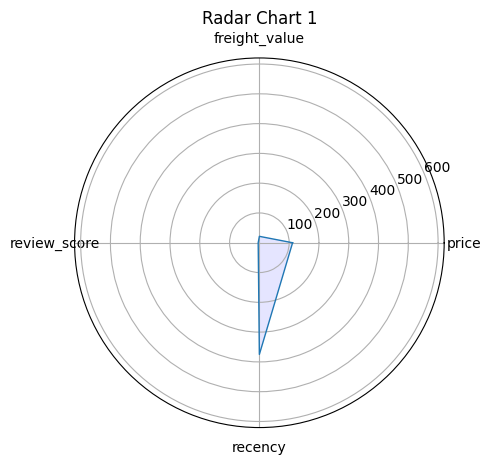

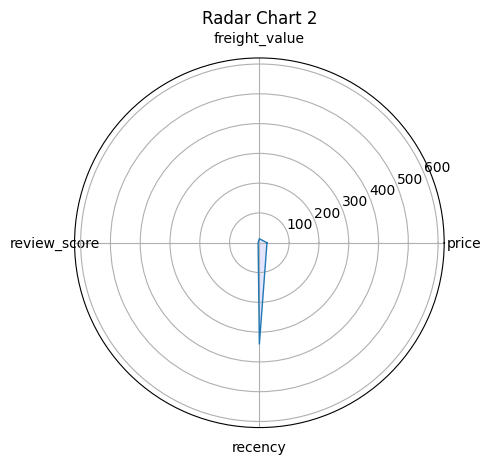

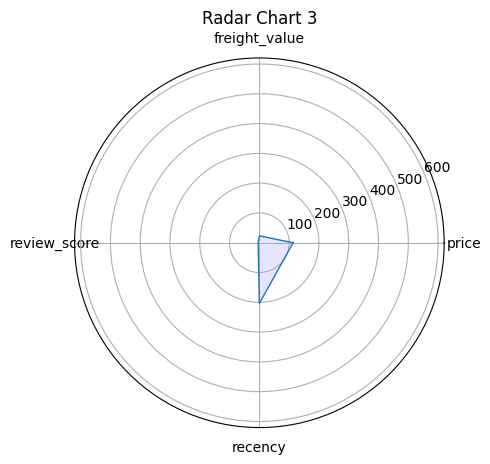

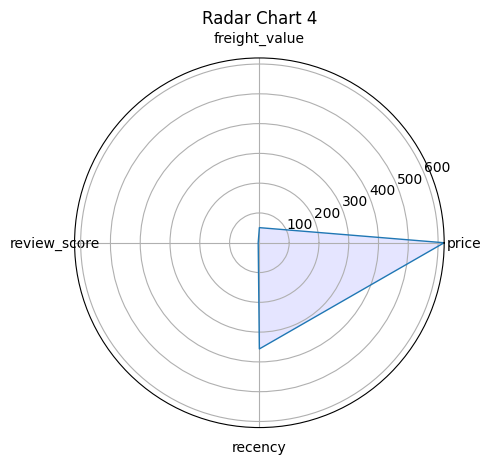

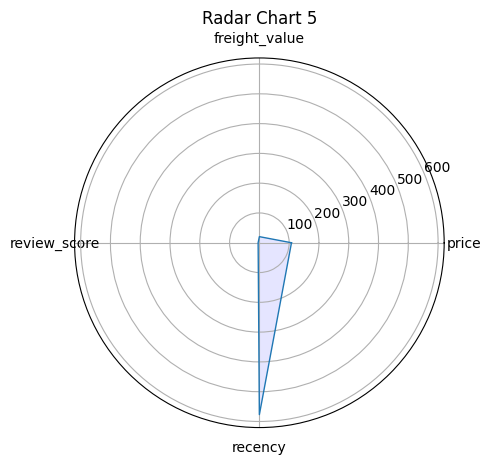

In [599]:
# Tracer un radar chart pour chaque ligne
for i in range(len(df_radar)):
    # Récupérer les valeurs pour cette ligne
    values = df_radar.iloc[i].values
    # Ajouter la première valeur à la fin pour fermer la boucle
    values = np.concatenate((values, [values[0]]))
    # Récupérer les noms des variables
    names = df_radar.columns
    # Calculer le nombre de variables
    num_vars = len(names)
    # Calculer l'angle de chaque axe en radians
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    # Créer un sous-graphique pour ce radar chart
    ax = plt.subplot(111, polar=True)
    # Tracer le radar chart
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Remplir la zone intérieure du radar chart
    ax.fill(angles, values, 'b', alpha=0.1)
    # Définir les noms des axes
    ax.set_thetagrids(np.degrees(angles[:-1]), names)
    # Définir la plage des axes
    ax.set_ylim([0, max(df_radar.values.max(axis=1))])
    # Ajouter un titre pour ce radar chart
    plt.title('Radar Chart ' + str(i+1))
    # Afficher le graphique
    plt.show()

In [582]:
import matplotlib.pyplot as plt
import pygal

# Calcule la moyenne des variables pour chaque cluster
cluster_means = df_cluster.groupby('group').mean()

# Crée une liste des variables
variables = list(cluster_means.columns)

# Crée une liste des valeurs moyennes pour chaque variable pour chaque cluster
values = [list(cluster_means.loc[cluster]) for cluster in cluster_means.index]

# Crée un graphique radar
radar_chart = pygal.Radar(fill=True)
radar_chart.title = 'Graphique Radar des Clusters'
radar_chart.x_labels = variables

# Ajoute les données pour chaque cluster
for i, cluster_values in enumerate(values):
    radar_chart.add('Cluster ' + str(i), cluster_values)

# Exporte le graphique radar au format svg
radar_chart.render_to_file('radar_chart.png')

# Affiche le graphique radar
img = plt.imread('radar_chart.png')
plt.imshow(img)
plt.axis('off')
plt.show()


SyntaxError: not a PNG file (<string>)

In [609]:

# Définition des couleurs pour chaque ligne
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Tracé des radar charts pour chaque ligne
fig = go.Figure()
for i in range(len(df_radar)):
    fig.add_trace(go.Scatterpolar(
        r=list(df_radar.iloc[i]),
        theta=list(df_radar.columns),
        fill='toself',
        name=f'Cluster {i+1}',
        line_color=colors[i]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showticklabels=True,
            tickfont=dict(size=16)
        ),
        angularaxis=dict(
            tickfont=dict(size=16)
        )
    ),
    height=600
)

# Affichage du graphique
fig.show()